### Calculate the PMEs for the funds

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.optimize import newton
from datetime import datetime

In [2]:
from pme_calc import sp500_data, index_weighted_cashflows, ln_pme, ks_pme, pme_plus, direct_alpha, xirr, moic

from data_gen import simulate_private_equity_cashflows
sp500_final = sp500_data()
cashflows = simulate_private_equity_cashflows()
df = index_weighted_cashflows(cashflows, sp500_final)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
pme_funds = []
for fund_id in df['FundID'].unique():
    fund_df = df[df['FundID'] == fund_id].reset_index(drop=True)
    pme_funds.append({
        'FundID': fund_id,
        'LN_PME': ln_pme(fund_df),
        'KS_PME': ks_pme(fund_df),
        'PME_plus': pme_plus(fund_df),
        'Direct_Alpha': direct_alpha(fund_df),
        'IRR': xirr(fund_df['date'], fund_df['Cashflow']),
        'moic': moic(fund_df)
    })

In [4]:
len(pme_funds)

2400

In [5]:
pme_funds[1]

{'FundID': 1,
 'LN_PME': 0.00022140485759063907,
 'KS_PME': 1.616767707255063,
 'PME_plus': 0.012332175159882476,
 'Direct_Alpha': 0.08616516886462797,
 'IRR': 0.1041826430825198,
 'moic': 1.7355694196305935}

In [6]:
ln_pme_list = []
for i in range(len(pme_funds)):
    ln_pme_list.append(pme_funds[i]['LN_PME'])

ks_pme_list = []
for i in range(len(pme_funds)):
    ks_pme_list.append(pme_funds[i]['KS_PME'])

pme_plus_list = []
for i in range(len(pme_funds)):
    pme_plus_list.append(pme_funds[i]['PME_plus'])

direct_alpha_list = []
for i in range(len(pme_funds)):
    direct_alpha_list.append(pme_funds[i]['Direct_Alpha'])

irr_list = []
for i in range(len(pme_funds)):
    irr_list.append(pme_funds[i]['IRR'])

moic_list = []
for i in range(len(pme_funds)):
    moic_list.append(pme_funds[i]['moic'])

### first plots

In [7]:

filtered = [x for x in ln_pme_list if x is not None and x <= 1]
len(filtered)

1926

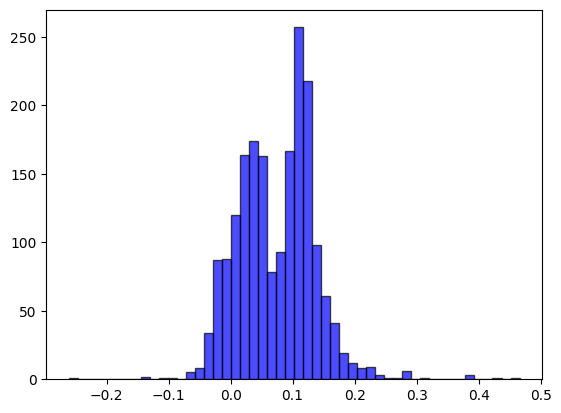

In [8]:
plt.hist(filtered, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.show()

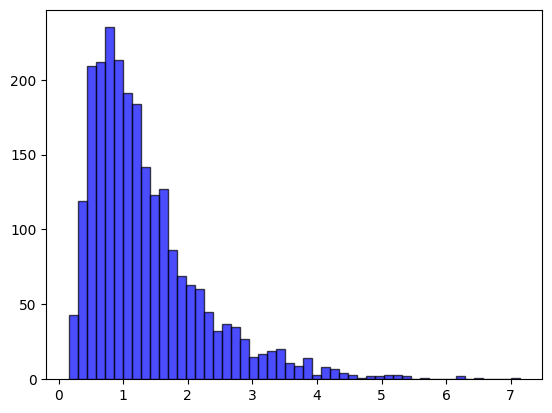

In [9]:
plt.hist(ks_pme_list, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.show()

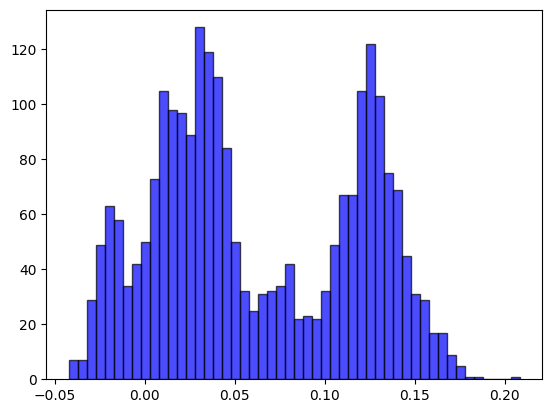

In [10]:
plt.hist(pme_plus_list, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.show()

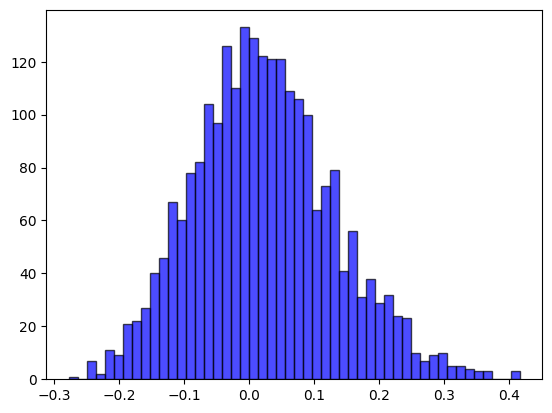

In [11]:
plt.hist(direct_alpha_list, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.show()

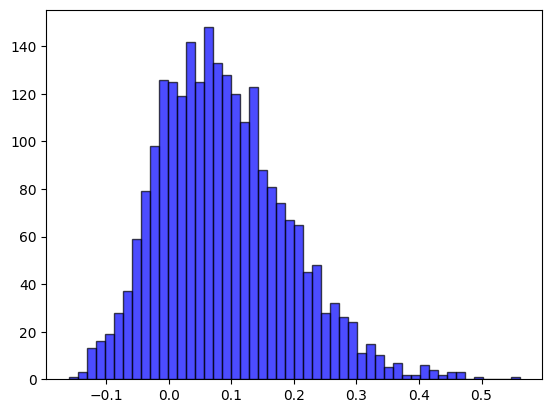

In [12]:
plt.hist(irr_list, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.show()

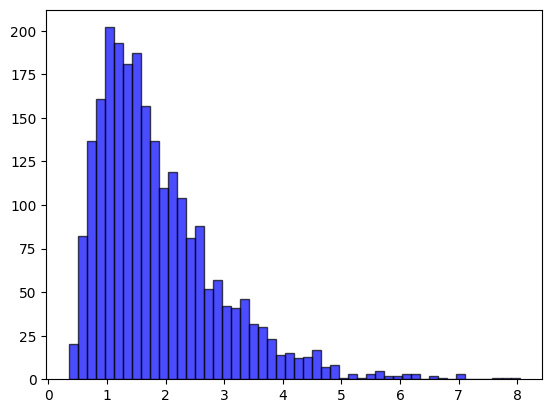

In [24]:
plt.hist(moic_list, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.show()

### Final plots

In [ ]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   ------------- -------------------------- 102.4/294.9 kB 1.2 MB/s eta 0:00:01
   ------------------------------- -------- 235.5/294.9 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Asus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


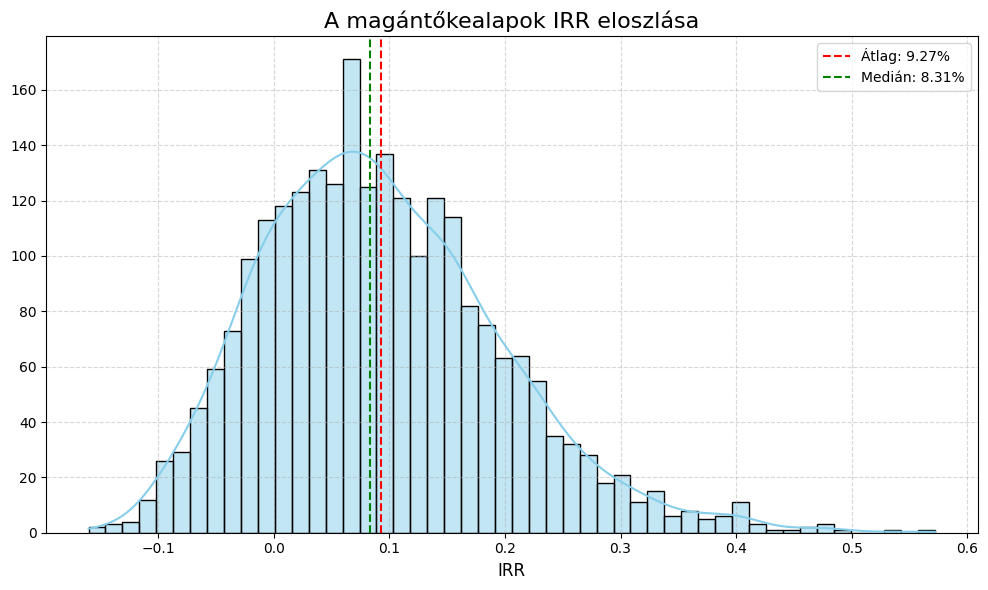

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assume irr_list is your list/array of IRRs
irr_array = np.array(irr_list)

plt.figure(figsize=(10, 6))
sns.histplot(irr_array, bins=50, kde=True, color='skyblue', edgecolor='black')

# Add vertical lines for mean and median
plt.axvline(irr_array.mean(), color='red', linestyle='--', linewidth=1.5, label=f'Átlag: {irr_array.mean():.2%}')
plt.axvline(np.median(irr_array), color='green', linestyle='--', linewidth=1.5, label=f'Medián: {np.median(irr_array):.2%}')

# Add titles and labels
plt.title('A magántőkealapok IRR eloszlása', fontsize=16)
plt.xlabel('IRR', fontsize=12)
plt.ylabel('', fontsize=12)
plt.legend()

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()

# plt.savefig("irr_distr", format='pdf', bbox_inches='tight')

plt.show()


In [55]:
(0.25 > irr_array ).sum() / len(irr_array) * 100

92.75

In [48]:
min(irr_array), max(irr_array)

(-0.16028627185561767, 0.57230690622765)

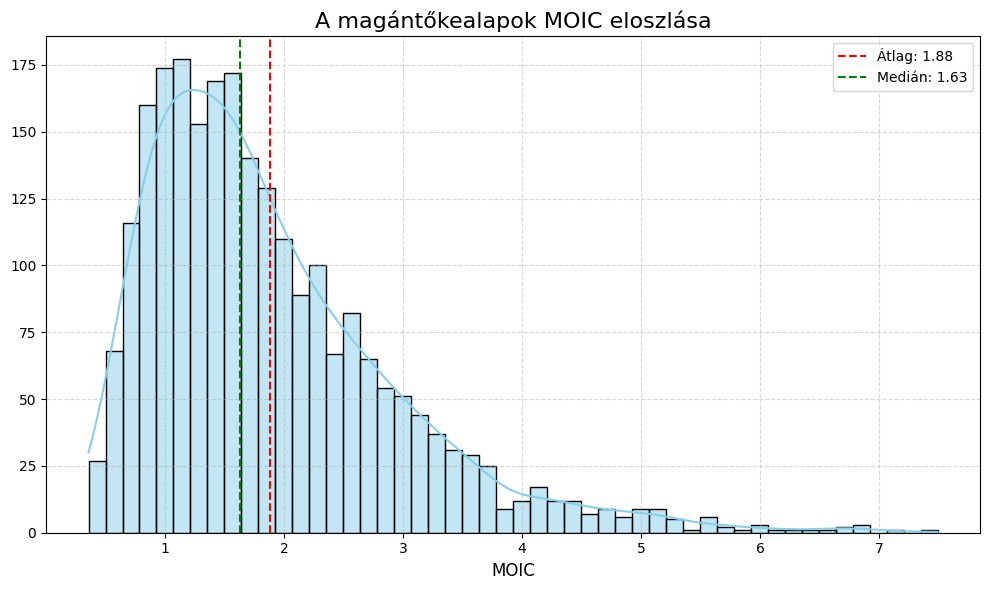

In [56]:
irr_array = np.array(moic_list)

plt.figure(figsize=(10, 6))
sns.histplot(irr_array, bins=50, kde=True, color='skyblue', edgecolor='black')

# Add vertical lines for mean and median
plt.axvline(irr_array.mean(), color='red', linestyle='--', linewidth=1.5, label=f'Átlag: {irr_array.mean():.2f}')
plt.axvline(np.median(irr_array), color='green', linestyle='--', linewidth=1.5, label=f'Medián: {np.median(irr_array):.2f}')

# Add titles and labels
plt.title('A magántőkealapok MOIC eloszlása', fontsize=16)
plt.xlabel('MOIC', fontsize=12)
plt.ylabel('', fontsize=12)
plt.legend()

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()

# plt.savefig("moic_distr", format='pdf', bbox_inches='tight')

plt.show()

In [57]:
(irr_array > 1).sum() / len(irr_array) * 100

80.95833333333333

In [58]:
min(irr_array), max(irr_array)

(0.35847658745678573, 7.49203727409993)

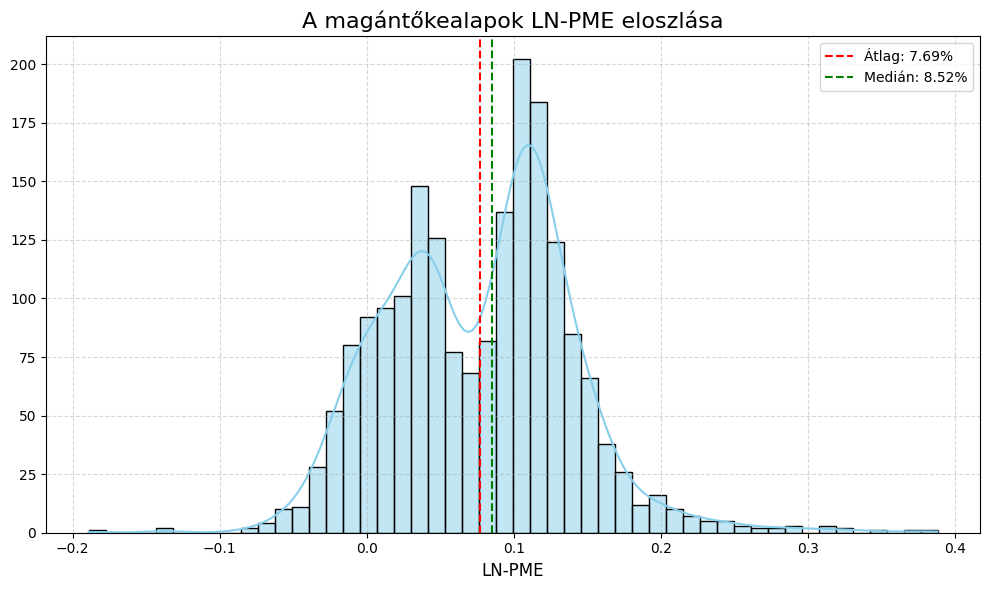

In [60]:
import math
clean_lst = [x for x in ln_pme_list if x is not None and x <= 1]
irr_array = np.array(clean_lst)

plt.figure(figsize=(10, 6))
sns.histplot(irr_array, bins=50, kde=True, color='skyblue', edgecolor='black')

# Add vertical lines for mean and median
plt.axvline(irr_array.mean(), color='red', linestyle='--', linewidth=1.5, label=f'Átlag: {irr_array.mean():.2%}')
plt.axvline(np.median(irr_array), color='green', linestyle='--', linewidth=1.5, label=f'Medián: {np.median(irr_array):.2%}')

# Add titles and labels
plt.title('A magántőkealapok LN-PME eloszlása', fontsize=16)
plt.xlabel('LN-PME', fontsize=12)
plt.ylabel('', fontsize=12)
plt.legend()

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()

# plt.savefig("lnpme_distr", format='pdf', bbox_inches='tight')

plt.show()

In [65]:
first_pup = []
for fund in pme_funds:
    if fund['LN_PME'] != None:
        if fund['LN_PME'] < 0.08:
            first_pup.append(fund['FundID'])

In [82]:
second_pup = []
for fund in pme_funds:
    if fund['LN_PME'] != None:
        if fund['LN_PME'] > 0.08 and fund['LN_PME'] < 0.15:
            second_pup.append(fund['FundID'])

In [83]:
len(second_pup)

823

In [95]:
first = df[df['FundID'].isin(first_pup)]
first['VintageYear'].value_counts()

VintageYear
1996    4985
2006    4179
1997    4009
2001    3944
2004    3940
2000    3829
1998    3740
2007    3263
2002    3160
1999    3017
2003    2706
2005    1685
1995    1598
2009     635
2008     158
1991     153
1993     116
1990     106
1994      57
Name: count, dtype: int64

In [96]:
second = df[df['FundID'].isin(second_pup)]
second['VintageYear'].value_counts()

VintageYear
2009    5301
1994    5251
2008    5207
1992    4871
1990    4752
1991    4332
1993    3925
1995    3604
2007    2150
1996     777
1997     395
2003     150
1998     145
2001     135
2002     135
2000      47
1999      41
Name: count, dtype: int64

In [97]:
good_vintages = [1990,1991,1992,1993,1994,1995,2007,2008,2009]
bad_vintages = [1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006]

In [99]:
first_df = df[df['VintageYear'].isin(bad_vintages)]
second_df = df[df['VintageYear'].isin(good_vintages)]

In [100]:
first_funds = []
for fund_id in first_df['FundID'].unique():
    fund_df = first_df[first_df['FundID'] == fund_id].reset_index(drop=True)
    first_funds.append({
        'FundID': fund_id,
        'LN_PME': ln_pme(fund_df),
        'KS_PME': ks_pme(fund_df),
        'PME_plus': pme_plus(fund_df),
        'Direct_Alpha': direct_alpha(fund_df),
        'IRR': xirr(fund_df['date'], fund_df['Cashflow']),
        'moic': moic(fund_df)
    })

In [102]:
second_funds = []
for fund_id in second_df['FundID'].unique():
    fund_df = second_df[second_df['FundID'] == fund_id].reset_index(drop=True)
    second_funds.append({
        'FundID': fund_id,
        'LN_PME': ln_pme(fund_df),
        'KS_PME': ks_pme(fund_df),
        'PME_plus': pme_plus(fund_df),
        'Direct_Alpha': direct_alpha(fund_df),
        'IRR': xirr(fund_df['date'], fund_df['Cashflow']),
        'moic': moic(fund_df)
    })

In [133]:
first_list = []
for i in range(len(first_funds)):
    first_list.append(first_funds[i]['PME_plus'])
second_list = []
for i in range(len(second_funds)):
    second_list.append(second_funds[i]['PME_plus'])

In [134]:
cleared_first = [x for x in first_list if x is not None and x <= 1]
cleared_second = [x for x in second_list if x is not None and x <= 1]

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create figure
plt.figure(figsize=(10, 6))

# Plot histograms
plt.hist(cleared_first, bins=50, alpha=0.6, color='steelblue', edgecolor='black', label='1996-2006')
plt.hist(cleared_second, bins=50, alpha=0.6, color='indianred', edgecolor='black', label='1990-1995, 2007-2009')
# plt.hist(cleared_second, bins=50, alpha=0.6, color='indianred', edgecolor='black', label='Good Vintages')

# Labels and title
plt.xlabel("LN-PME", fontsize=12)
plt.ylabel("", fontsize=12)
plt.title("A két évjárati csoport LN-PME eloszlása", fontsize=14)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()

# plt.savefig("lnvintage_distr", format='pdf', bbox_inches='tight')

plt.show()


NameError: name 'cleared_first' is not defined

<Figure size 1000x600 with 0 Axes>

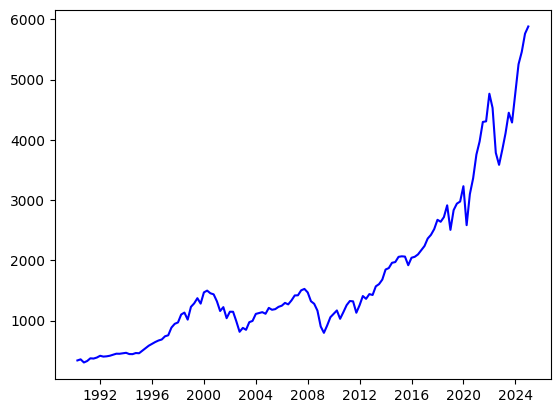

In [94]:
plt.plot(sp500_final['date'], sp500_final['index'], label='S&P 500', color='blue')

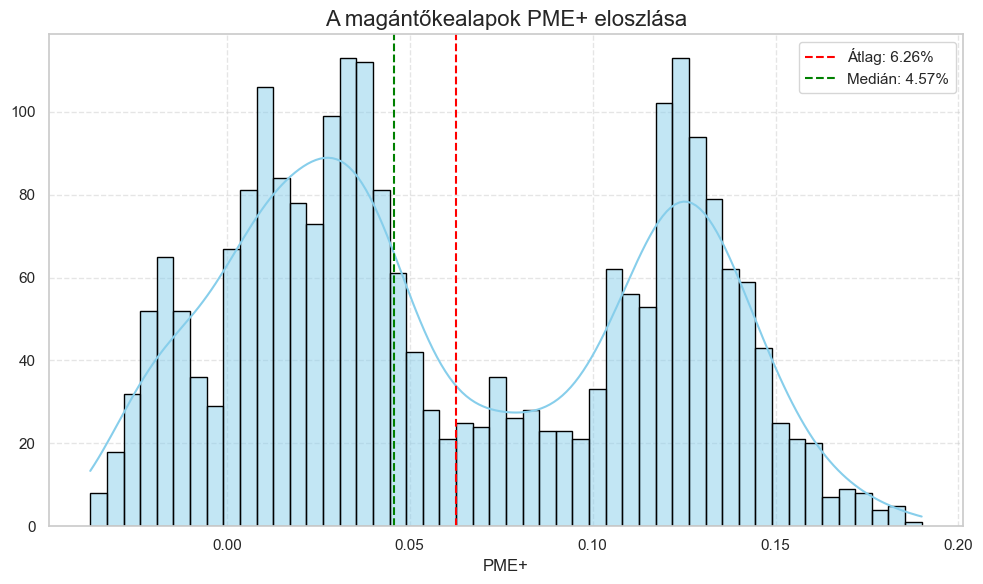

In [139]:
irr_array = np.array(pme_plus_list)

plt.figure(figsize=(10, 6))
sns.histplot(irr_array, bins=50, kde=True, color='skyblue', edgecolor='black')

# Add vertical lines for mean and median
plt.axvline(irr_array.mean(), color='red', linestyle='--', linewidth=1.5, label=f'Átlag: {irr_array.mean():.2%}')
plt.axvline(np.median(irr_array), color='green', linestyle='--', linewidth=1.5, label=f'Medián: {np.median(irr_array):.2%}')

# Add titles and labels
plt.title('A magántőkealapok PME+ eloszlása', fontsize=16)
plt.xlabel('PME+', fontsize=12)
plt.ylabel('', fontsize=12)
plt.legend()

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()

plt.savefig("pmeplus_distr", format='pdf', bbox_inches='tight')

plt.show()


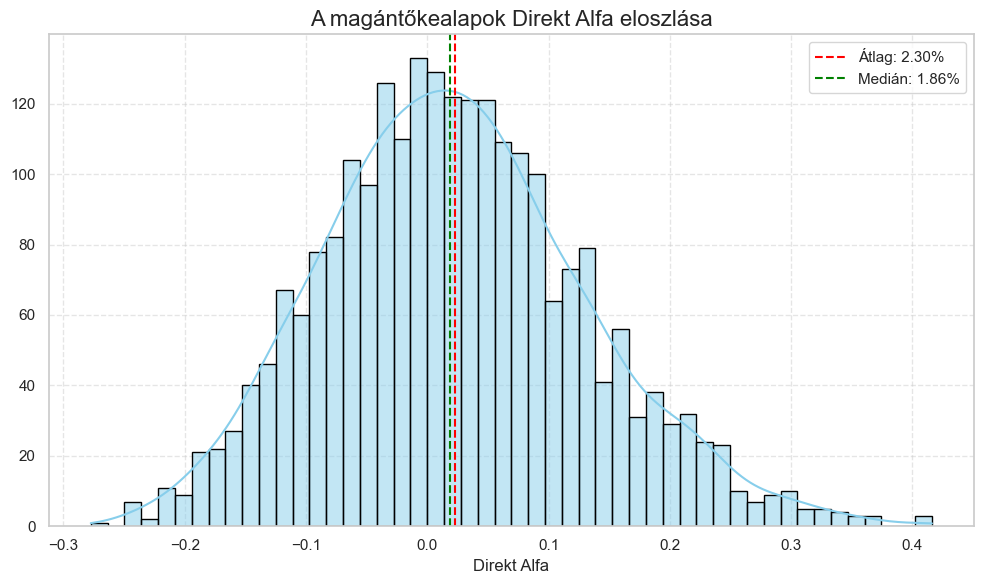

In [16]:
irr_array = np.array(direct_alpha_list)

plt.figure(figsize=(10, 6))
sns.histplot(irr_array, bins=50, kde=True, color='skyblue', edgecolor='black')

# Add vertical lines for mean and median
plt.axvline(irr_array.mean(), color='red', linestyle='--', linewidth=1.5, label=f'Átlag: {irr_array.mean():.2%}')
plt.axvline(np.median(irr_array), color='green', linestyle='--', linewidth=1.5, label=f'Medián: {np.median(irr_array):.2%}')

# Add titles and labels
plt.title('A magántőkealapok Direkt Alfa eloszlása', fontsize=16)
plt.xlabel('Direkt Alfa', fontsize=12)
plt.ylabel('', fontsize=12)
plt.legend()

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()

plt.savefig("da_distr", format='pdf', bbox_inches='tight')

plt.show()

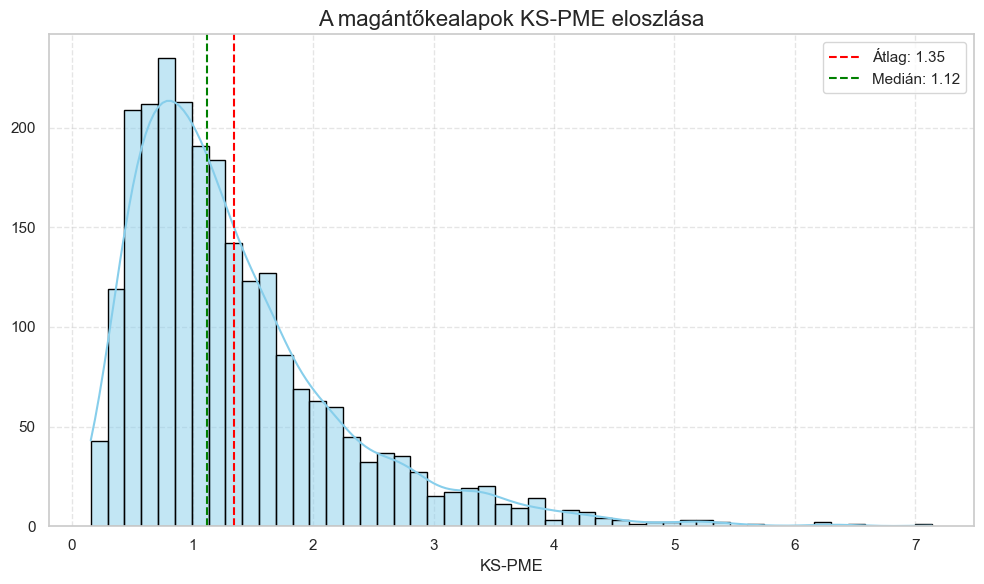

In [19]:
irr_array = np.array(ks_pme_list)

plt.figure(figsize=(10, 6))
sns.histplot(irr_array, bins=50, kde=True, color='skyblue', edgecolor='black')

# Add vertical lines for mean and median
plt.axvline(irr_array.mean(), color='red', linestyle='--', linewidth=1.5, label=f'Átlag: {irr_array.mean():.2f}')
plt.axvline(np.median(irr_array), color='green', linestyle='--', linewidth=1.5, label=f'Medián: {np.median(irr_array):.2f}')

# Add titles and labels
plt.title('A magántőkealapok KS-PME eloszlása', fontsize=16)
plt.xlabel('KS-PME', fontsize=12)
plt.ylabel('', fontsize=12)
plt.legend()

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()

plt.savefig("kspme_distr", format='pdf', bbox_inches='tight')

plt.show()

In [20]:
min(ks_pme_list), max(ks_pme_list)

(0.15481084075905993, 7.1374976339048235)

In [22]:
(irr_array > 1).sum() / len(ks_pme_list) * 100

56.54166666666667